# Multiple linear regression demo

Load packages we will use

In [1]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression two ways
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Electricity usage example

In [2]:
fn = 'https://raw.githubusercontent.com/stanford-mse-125/demos/main/data/elec_usage.txt'
usage = pd.read_csv(fn)
usage.head()

,month,year,usage,temperature
0,8,1989,24.828,73
1,9,1989,24.688,67
2,10,1989,19.310,57
3,11,1989,59.706,43
4,12,1989,99.667,26


<AxesSubplot:xlabel='month', ylabel='Count'>

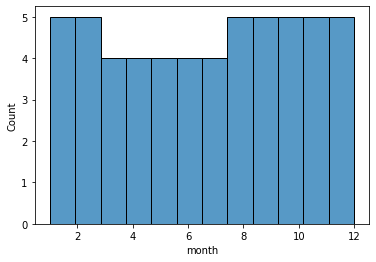

In [3]:
sns.histplot(usage['month'], bins=12)

<AxesSubplot:xlabel='temperature', ylabel='usage'>

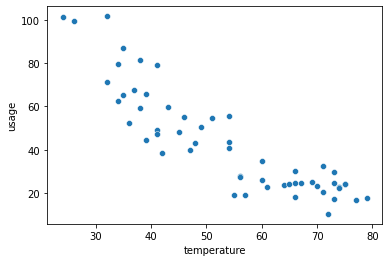

In [4]:
sns.scatterplot(x='temperature', y='usage', data=usage)

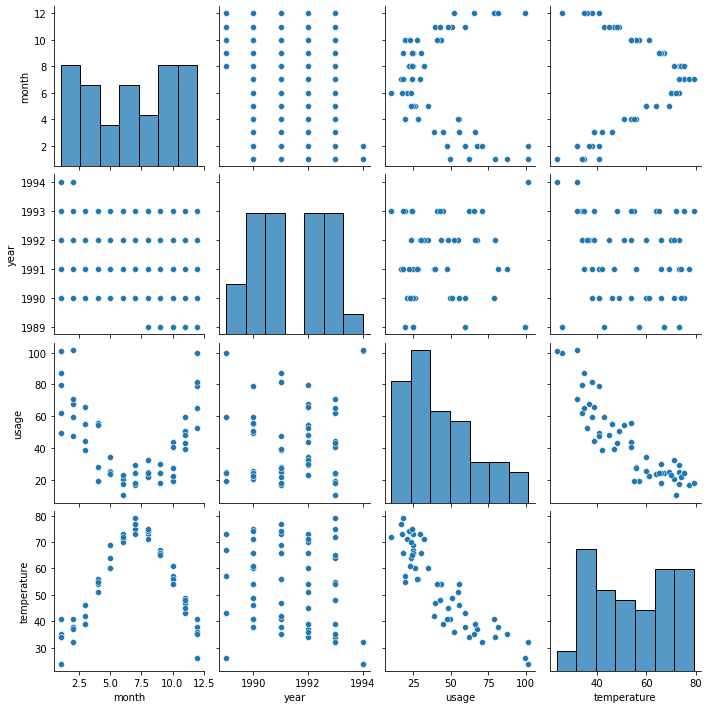

In [5]:
sns.pairplot(usage)

# Fit a linear model to predict electricity usage

In [6]:
# Collect data into *design matrix* X and *target vector* y
features = ['temperature', 'month']
target = 'usage'

X = usage[features] # the design matrix
Y = usage[target]   # the target vector
X.head() 

,temperature,month
0,73,8
1,67,9
2,57,10
3,43,11
4,26,12


In [7]:
X = sm.add_constant(X)
X.head()

,const,temperature,month
0,1.0,73,8
1,1.0,67,9
2,1.0,57,10
3,1.0,43,11
4,1.0,26,12


In [8]:
# Fit the model with statsmodels
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     92.46
Date:                Sun, 14 May 2023   Prob (F-statistic):           7.53e-18
Time:                        15:16:13   Log-Likelihood:                -210.65
No. Observations:                  55   AIC:                             427.3
Df Residuals:                      52   BIC:                             433.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         116.8641      5.841     20.006      0.000     105.142     128.586
temperature    -1.3622      0.104    -13.150      0.000      -1.570      -1.154
month          -0.0415      0.450     -0.092      0.927      -0.944       0.861
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.465
Skew:                           0.128   Prob(JB):                        0.792
Kurtosis:                       2.630   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='temperature', ylabel='usage'>

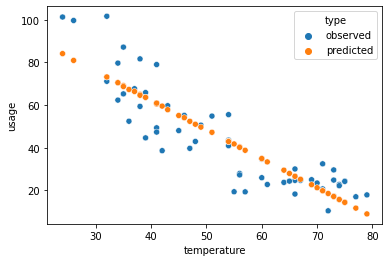

In [9]:
# plot observed vs predicted usage as a function of temperature
usage['predicted'] = Yhat
usage_by_temp = usage[['temperature', 'usage', 'predicted']]
usage_by_temp = usage_by_temp.rename(columns={'usage': 'observed'})
usage_by_temp = usage_by_temp.melt(id_vars='temperature')
usage_by_temp = usage_by_temp.rename(columns={'variable': 'type'})
usage_by_temp = usage_by_temp.rename(columns={'value': 'usage'})
sns.scatterplot(x='temperature', y='usage', hue='type', data=usage_by_temp)

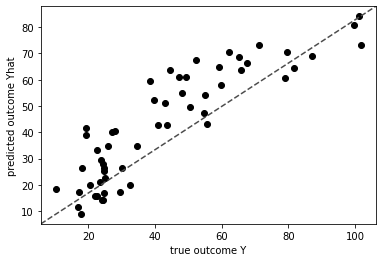

In [10]:
# Plot quality of fit by comparing observed vs predicted usage
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

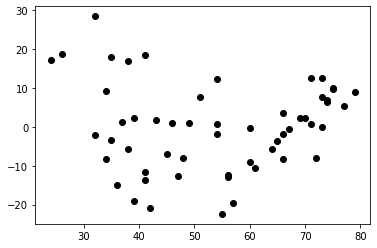

In [11]:
# are residuals iid?
plt.scatter(usage['temperature'], model.resid,  color='black')

<AxesSubplot:ylabel='Count'>

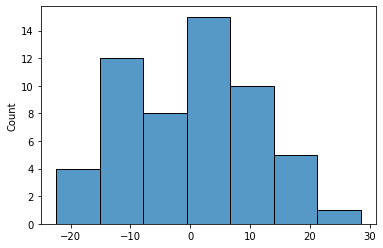

In [12]:
# are residuals normal?
sns.histplot(model.resid)

# Improving the model

* add a constant to the model
* add more nonlinear features to the model

In [13]:
# add a constant to X, then refit the model
X = sm.add_constant(X)
X.head()

,const,temperature,month
0,1.0,73,8
1,1.0,67,9
2,1.0,57,10
3,1.0,43,11
4,1.0,26,12


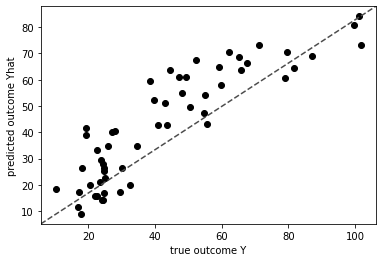

In [14]:
# Fit the model with statsmodels
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

# Add more features!

In [15]:
# add two more predictors: nonlinear functions of original variables
usage['tempsqr'] = usage['temperature']**2
usage['yearcts'] = usage['year'] + (usage['month']-1)/12
usage.head()

,month,year,usage,temperature,predicted,tempsqr,yearcts
0,8,1989,24.828,73,17.088223,5329,1989.583333
1,9,1989,24.688,67,25.220125,4489,1989.666667
2,10,1989,19.310,57,38.800991,3249,1989.750000
3,11,1989,59.706,43,57.830819,1849,1989.833333
4,12,1989,99.667,26,80.947371,676,1989.916667


In [16]:
variables = list(usage.columns)
variables

['month', 'year', 'usage', 'temperature', 'predicted', 'tempsqr', 'yearcts']

In [17]:
features = variables[0:2] + variables[3:4] + variables[5:]
features

['month', 'year', 'temperature', 'tempsqr', 'yearcts']

In [18]:
X = usage[features] # the design matrix
X.head() 

,month,year,temperature,tempsqr,yearcts
0,8,1989,73,5329,1989.583333
1,9,1989,67,4489,1989.666667
2,10,1989,57,3249,1989.750000
3,11,1989,43,1849,1989.833333
4,12,1989,26,676,1989.916667


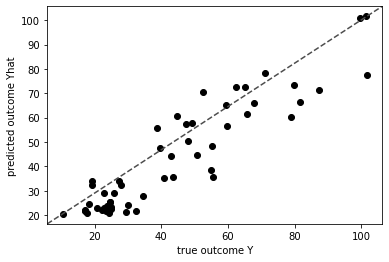

In [19]:
# Fit the model with statsmodels
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

# poll: is this still a linear model?

* yes, the model is still linear in the parameters beta
* no, the model is not linear since it depends on the square of temperature

# formulas

formulas make it easy to try different models

In [20]:
# fit a least squares model
model = smf.ols(formula='usage ~ 1 + temperature + I(temperature**2)', data=usage).fit()
Yhat = model.predict(X) # make the predictions by the model

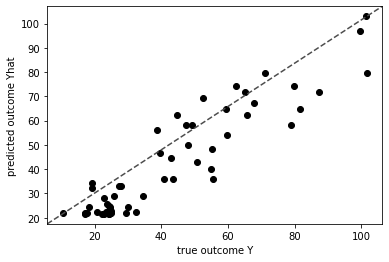

In [21]:
# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

# add the line y=x
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()

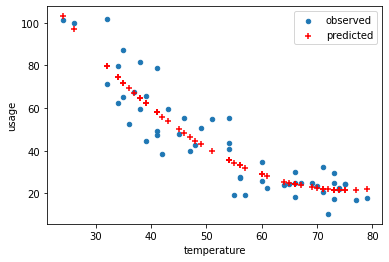

In [22]:
# plot observed vs predicted usage as a function of temperature
p = usage.plot.scatter(x='temperature', y='usage', label='observed')
p.scatter(x=usage['temperature'], y=Yhat, color='r', marker="+", label='predicted')
plt.legend()

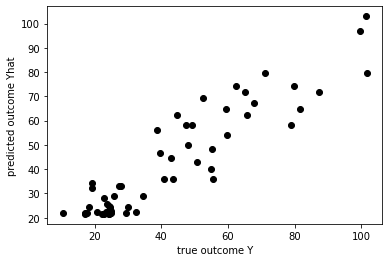

In [23]:
# let's make a function to plot predictions against truth
def plot_fit(Y, Yhat):
    plt.scatter(Y, Yhat,  color='black')
    plt.xlabel("true outcome Y")
    plt.ylabel("predicted outcome Yhat")
    plt.show()
    
plot_fit(Y, Yhat)

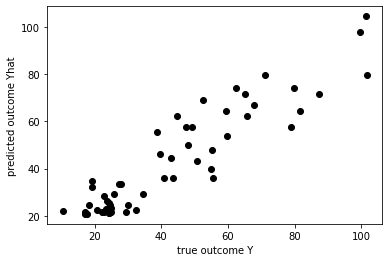

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.24
Date:                Sun, 14 May 2023   Prob (F-statistic):           8.40e-21
Time:                        15:16:14   Log-Likelihood:                -200.69
No. Observations:                  55   AIC:                             409.4
Df Residuals:                      51   BIC:                             417.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  212.9949     54.111      3.936      0.000     104.363     321.626
temperature                 -5.6893      3.369     -1.688      0.097     -12.454       1.075
np.power(temperature, 2)     0.0520      0.067      0.775      0.442      -0.083       0.187
np.power(temperature, 3)    -0.0001      0.000     -0.318      0.752      -0.001       0.001
==============================================================================
Omnibus:                        1.438   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.122
Skew:                           0.349   Prob(JB):                        0.571
Kurtosis:                       2.967   Cond. No.                     9.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# we could even make a function to help us visually search for a good model 

def assess_model_quality(data, formula):
    model = smf.ols(formula=formula, data=data).fit()
    Yhat = model.predict(X)
    plot_fit(Y, Yhat)
    return model.summary()
    
assess_model_quality(usage, 'usage ~ 1 + temperature + np.power(temperature, 2) + np.power(temperature, 3)')

# Now let's fit the same model, using sklearn

In [25]:
lm = LinearRegression()
model = lm.fit(X,Y)
model

LinearRegression()

In [26]:
Yhat = lm.predict(X)
Yhat[:5]

array([ 23.43680686,  25.50676803,  33.97277473,  56.57815002,
       100.98360633])

In [27]:
# how well does the model fit? 
lm.score(X,Y) # R^2 score

0.8497213568380633

In [28]:
# what about the coefficients?
lm.coef_

array([ 0.24639928, -0.34673328, -4.82539599,  0.03226385, -0.32620001])

In [29]:
# and the intercept β_0
lm.intercept_

1540.4400710617704

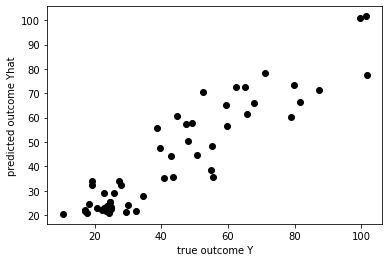

In [30]:
# and visualize the fit 
plot_fit(Y, Yhat)